In [7]:
!pip install Pillow

In [8]:
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

In [9]:
image_path = r"C:\Users\HP\Downloads\raster image.tiff"
image = Image.open(image_path)

image.show()

In [10]:
zoom_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description="Zoom:")
pan_x_slider = widgets.FloatSlider(value=0, min=-50, max=50, step=1, description="Pan X:")
pan_y_slider = widgets.FloatSlider(value=0, min=-50, max=50, step=1, description="Pan Y:")

In [11]:
def update_image(zoom, pan_x, pan_y):
    zoomed_image = image.resize((int(image.width * zoom), int(image.height * zoom)))
    shifted_image = Image.new("RGB", image.size)
    shifted_image.paste(zoomed_image, (int(pan_x), int(pan_y)))

    shifted_image.show()

widgets.interactive(update_image, zoom=zoom_slider, pan_x=pan_x_slider, pan_y=pan_y_slider)

interactive(children=(FloatSlider(value=1.0, description='Zoom:', max=2.0, min=0.1), FloatSlider(value=0.0, de…

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [13]:
multi_band_image_path = r"C:\Users\HP\Downloads\raster image.tiff"
multi_band_image = np.array(Image.open(multi_band_image_path))

In [14]:
def visualize_band_combination(band1, band2, band3):
    rgb_image = np.stack([multi_band_image[:, :, band1 - 1],
                         multi_band_image[:, :, band2 - 1],
                         multi_band_image[:, :, band3 - 1]], axis=-1)

    plt.imshow(rgb_image)
    plt.title(f"Band Combination: ({band1}, {band2}, {band3})")
    plt.axis("off")
    plt.show()

interact(visualize_band_combination, band1=(1, multi_band_image.shape[2], 1),
         band2=(1, multi_band_image.shape[2], 1),
         band3=(1, multi_band_image.shape[2], 1))

interactive(children=(IntSlider(value=2, description='band1', max=3, min=1), IntSlider(value=2, description='b…

<function __main__.visualize_band_combination(band1, band2, band3)>

In [15]:
!pip install geopandas matplotlib ipywidgets

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/90/37/08e416c9915dcf7d53deb0fbdb702266902c584617dfa6e6c84fb2fc6ee3/geopandas-0.14.3-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/27/b24c1610c7ae5716709321f04d38d7b8b71ed531f80df4f697b9ad99cfc3/fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 439.5 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https:/

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown

gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'

shapefile_path = r"C:\Users\HP\Downloads\india_India_Country_Boundary"
gdf = gpd.read_file(shapefile_path)

def plot_attribute_chart(attribute_column):
    plt.figure(figsize=(10, 6))
    gdf[attribute_column].value_counts().plot(kind='bar')
    plt.title(f'Attribute Data Distribution - {attribute_column}')
    plt.xlabel(attribute_column)
    plt.ylabel('Count')
    plt.show()

attribute_columns = list(gdf.columns)

attribute_dropdown = Dropdown(options=attribute_columns, description='Select Attribute:')

def update_plot(attribute_column):
    plot_attribute_chart(attribute_column)

interact(update_plot, attribute_column=attribute_dropdown)

interactive(children=(Dropdown(description='Select Attribute:', options=('shapeiso', 'shape0', 'shapeid', 'sha…

<function __main__.update_plot(attribute_column)>

In [21]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


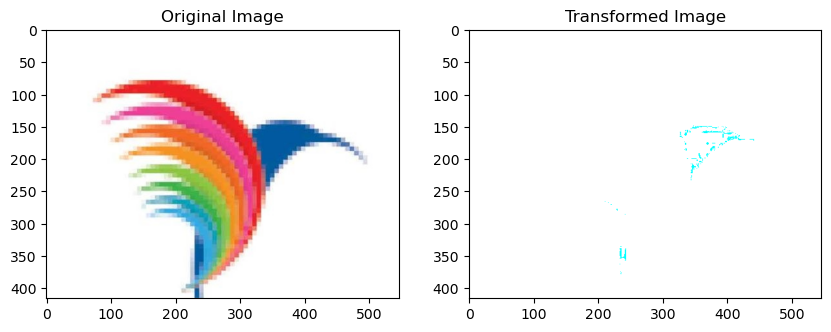

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

raster_image_path = r"C:\Users\HP\Downloads\raster image.tiff"
raster_image = np.array(Image.open(raster_image_path))

brightness_factor = 1.5
transformed_image = raster_image * brightness_factor

from scipy.ndimage import gaussian_filter
filtered_image = gaussian_filter(raster_image, sigma=1)

mean_value = np.mean(raster_image)
std_deviation = np.std(raster_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(raster_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.show()
